# Part I - Investigating the factors affecting the duration of biking in the busiest hours biking hours

## by Buhari Shehu

## Introduction
The bike sharing dataset of San Francisco Bay Area for the first quarter of 2019 was analysed in this project. It consists of  the following 16 features: `duration_sec, start_time, end_time, start_station_id, start_station_name,	start_station_latitude,	start_station_longitude,	end_station_id,	end_station_name,	end_station_latitude,	end_station_longitude,	bike_id	user_type,	member_birth_year,	member_gender, and	bike_share_for_all_trip`.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# import datetime
import datetime as dt

%matplotlib inline

**Loading the dataset**

In [2]:
data1 = pd.read_csv("201901-fordgobike-tripdata.csv")
data2 = pd.read_csv("201902-fordgobike-tripdata.csv")
data3 = pd.read_csv("201903-fordgobike-tripdata.csv")
data4 = pd.read_csv("201904-fordgobike-tripdata.csv")

**Checking the datasets**

In [10]:
data1.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No


In [11]:
data2.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [12]:
data3.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,1980.0,Other,No
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,1990.0,Male,No
2,79789,2019-03-31 11:48:34.2010,2019-04-01 09:58:23.8240,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,NaN,NaN,No


In [13]:
data4.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No


Verifying column names uniformity

In [6]:
data1.columns == data2.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [8]:
data2.columns == data3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [9]:
data3.columns == data4.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

**Merging the datasets**

In [3]:
bike_data = pd.concat([data4, data3, data2, data1], ignore_index=True)

### What is the structure of your dataset?

In [30]:
bike_data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No


In [31]:
bike_data.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
870901,565,2019-01-01 00:11:03.4410,2019-01-01 00:20:29.2680,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4783,Subscriber,1998.0,Male,Yes
870902,182,2019-01-01 00:09:56.2110,2019-01-01 00:12:58.7480,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,4621,Subscriber,1999.0,Male,Yes
870903,226,2019-01-01 00:07:10.5760,2019-01-01 00:10:57.1960,245.0,Downtown Berkeley BART,37.870139,-122.268422,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,5117,Customer,2000.0,Male,No


In [32]:
bike_data.shape

(870904, 16)

In [34]:
data1.shape[0] + data2.shape[0] + data3.shape[0] + data4.shape[0]

870904

The dataset consists of 870,904 records varied across 16 numerical and categorical features.

### What is/are the main feature(s) of interest in your dataset?

Biking duration `duration_sec` is my main feature of interest.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features: `start_time, user_type, member_birth_year, member_gender and bike_share_for_all_trip` will support my investigstion.

**Filtering out the features of interest**

In [4]:
features_interest =  ["duration_sec", "start_time", 
                      "user_type", 
                      "member_birth_year", 
                      "member_gender", 
                      "bike_share_for_all_trip"]
bike_data_f = bike_data[features_interest]

In [47]:
bike_data_f.head(3)

,duration_sec,start_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,Subscriber,1993.0,Male,No


In [48]:
bike_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870904 entries, 0 to 870903
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             870904 non-null  int64  
 1   start_time               870904 non-null  object 
 2   user_type                870904 non-null  object 
 3   member_birth_year        829997 non-null  float64
 4   member_gender            830000 non-null  object 
 5   bike_share_for_all_trip  870904 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 39.9+ MB


It can be observed that `member_birth_year` and `member_gender` have missing values. These needs to be imputed. `member_birth_year` will be imputed with the median age while `member_gender` will be imputed with the mode.

In [5]:
# median birth year
median_birth_year = bike_data_f.member_birth_year.median()
median_birth_year

1987.0

In [6]:
# mode of gender
gender_mode = bike_data_f.member_gender.mode()[0]
gender_mode

'Male'

In [7]:
# imputing birth year
bike_data_f['member_birth_year'] = bike_data_f['member_birth_year'].fillna(median_birth_year)

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\1966078097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f['member_birth_year'] = bike_data_f['member_birth_year'].fillna(median_birth_year)


In [8]:
#imputing the gender
bike_data_f['member_gender'] = bike_data_f['member_gender'].fillna(gender_mode)

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\2319309570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f['member_gender'] = bike_data_f['member_gender'].fillna(gender_mode)


In [58]:
bike_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870904 entries, 0 to 870903
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             870904 non-null  int64  
 1   start_time               870904 non-null  object 
 2   user_type                870904 non-null  object 
 3   member_birth_year        870904 non-null  float64
 4   member_gender            870904 non-null  object 
 5   bike_share_for_all_trip  870904 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 39.9+ MB


**Checking the summary statistics**

In [59]:
bike_data_f.describe()

,duration_sec,member_birth_year
count,870904.000000,870904.000000
mean,776.665073,1984.837953
std,1904.675372,9.833381
min,61.000000,1878.000000
25%,337.000000,1980.000000
50%,537.000000,1987.000000
75%,840.000000,1992.000000
max,86114.000000,2001.000000


There are outliers in `duration_sec` and `member_birth_year`. `duration_sec` has a maximum of 86114 seconds which is about 1 day. However, that will be left intact because it is possible for someone to rent a bike for one day. However, the minimum value of `member_birth_year` is 1878. This implies the member's age is 2019-1878 = 141 years. This seems incredible. For the purpose of this project, I assume that members with up to 70 years of age can ride a bike and those above are less likely to be able to ride a bike due to old age.

Let's see the proportion of these senior citizens.

In [9]:
# selecting those above 70
size_of_senior_citizens = len(bike_data_f[bike_data_f.member_birth_year<1949])
size_of_senior_citizens

2495

The value is negligible compared to number of records in the dataset which is 870,904. Thus, we can drop these records without much loss of information.

In [10]:
# selecting only those that are less than or equal 70
bike_data_f70 = bike_data_f[bike_data_f["member_birth_year"]>=1949]

In [11]:
# check
len(bike_data_f70[bike_data_f70.member_birth_year<1949])

0

**Feature engineering**

In this section, we are going to extract months, days, and hours from the start_time to see their distributions. However, we will need to convert `start_time` to datetime type. We will also evaluate the ages of the bikers.

In [12]:
# converting start time type to datetime
datetime = bike_data_f70['start_time'].astype('datetime64[ns]')
bike_data_f70['start_time'] = datetime

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\2419279308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f70['start_time'] = datetime


In [13]:
#check
bike_data_f70['start_time'].dtype

dtype('<M8[ns]')

***Extracting month***

In [14]:
bike_data_f70["month"] = bike_data_f70['start_time'].dt.month

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\3571893205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f70["month"] = bike_data_f70['start_time'].dt.month


***Extracting day***

In [15]:
bike_data_f70["day"] = bike_data_f70['start_time'].dt.day

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\639201549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f70["day"] = bike_data_f70['start_time'].dt.day


***Extracting hour***

In [16]:
bike_data_f70["hour"] = bike_data_f70['start_time'].dt.hour

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\1160040575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f70["hour"] = bike_data_f70['start_time'].dt.hour


***Extracting day of week***

In [17]:
bike_data_f70["day_of_week"] = bike_data_f70['start_time'].dt.day_name()

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\1255687959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f70["day_of_week"] = bike_data_f70['start_time'].dt.day_name()


***Evalauting members' ages***

In [18]:
bike_data_f70["ages"] = 2019 - bike_data_f70.member_birth_year

C:\Users\Buhari Shehu\AppData\Local\Temp\ipykernel_8920\1175442354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_f70["ages"] = 2019 - bike_data_f70.member_birth_year


In [19]:
#check
bike_data_f70.head(3)

,duration_sec,start_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,day_of_week,ages
0,50305,2019-04-30 22:33:55.155,Subscriber,1989.0,Female,No,4,30,22,Tuesday,30.0
1,53725,2019-04-30 20:43:41.632,Customer,1987.0,Male,No,4,30,20,Tuesday,32.0
2,78072,2019-04-30 10:32:46.489,Subscriber,1993.0,Male,No,4,30,10,Tuesday,26.0


## Univariate Exploration

In this section, I investigated distributions of individual variables in the dataset.

In [20]:
# make copy for univariate analysis
bike_data_copy = bike_data_f70.copy()

In [27]:
# exporting data for presentation notebook
bike_data_copy.to_csv("presentation.csv")

**Let's see the distribution of the duration**

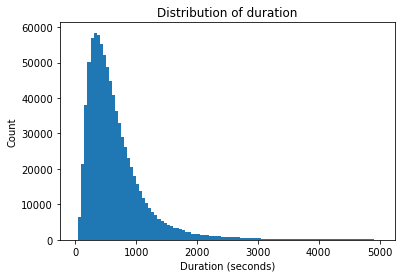

In [22]:
plt.hist(bike_data_copy['duration_sec'], bins=100, range=(0, 5000));
plt.title("Distribution of duration")
plt.ylabel("Count")
plt.xlabel('Duration (seconds)');

We can observe that the hiring duration is right skwed. It can be observed that majority of the rides are less than 90 minutes (5000s).

**Distribution of the months**

For code economy, let's create a function that will plot barcharts for us.

In [32]:
def bar(column, rotation=rotation, xlabel=xlabel, title=title):
    """takes pandas column, x ticks rotation, xlabel, title and returns a barchart of its values"""
    column.value_counts(sort=False).plot(kind='bar');
    plt.xticks(rotation=rotation)
    plt.title("Distribution of days of week")
    plt.xlabel(xlabel)
    plt.ylabel("Count");

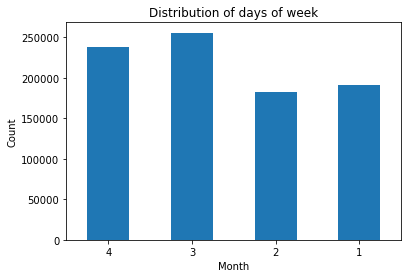

In [35]:
# ploting monthly distribution
bar(bike_data_copy.month, rotation=0, xlabel="Month", title="Distribution of Month")

The two consecutive months February and March recorded the least and the most bikings respectively.

**Distributions of the days**

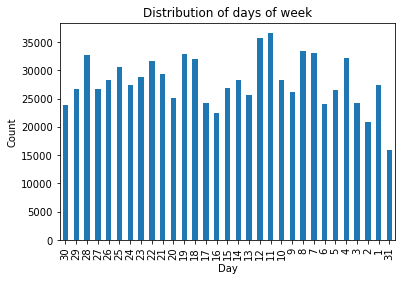

In [36]:
# plotting daily distribution
bar(bike_data_copy.day, rotation=90, xlabel="Day", title="Distribution of days")

Eleventh and the twelveth days recorded the most traffics while the 31st day recorded the least due to the fact that only march has 31 days of all the four months. The pattern of the number of daily rides is irregular.

**Let's see the distribution of number of bikings per week**

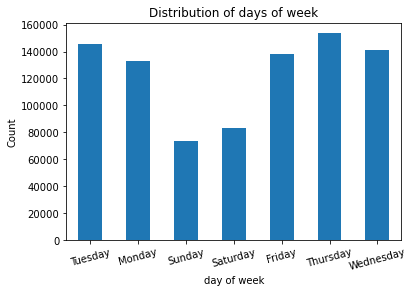

In [37]:
# plotting weekly distribution
bar(bike_data_copy.day_of_week, 
    rotation=15, 
    xlabel="day of week", 
    title="Distribution of day of week")

Thursday is the busiest day and as expected, less people biked on the weekends.

**Let's find the peak hours**

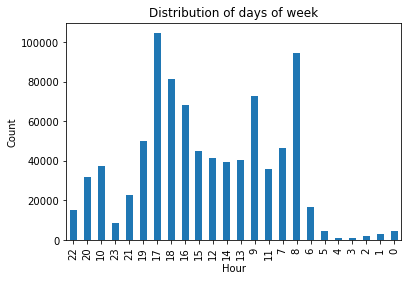

In [38]:
# plotting hourly distributions
bar(bike_data_copy.hour, 
    rotation=90, 
    xlabel="Hour", 
    title="Distribution of hours")


Seems most of the bikers are 9-5 workers as those hours seems the busiest. Majority of the rides happened during the daytimes as expected.

**Let's see the distribution of the user groups**

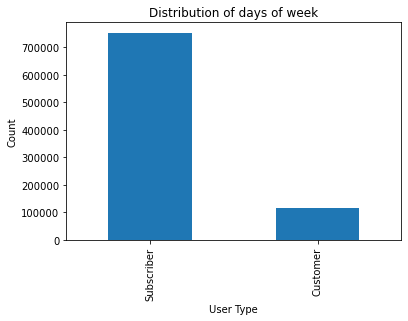

In [39]:
# user group distributions
bar(bike_data_copy.user_type, 
    rotation=90, 
    xlabel="User Type", 
    title="Distribution of user types")

Bike sharing has gain public acceptance as overwelming majority of the users are subscribers insread of one off users.

**Let's see the distribution of bike_share_for_all_trip.**

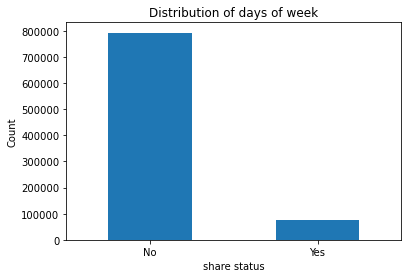

In [40]:
# plotting the column chart of bike share
bar(bike_data_copy.bike_share_for_all_trip, 
    rotation=0, 
    xlabel="share status", 
    title="Distribution of share status")

Overwhelming majority of the users don't check in on time. 

**Let's see the age distributions of the riders**

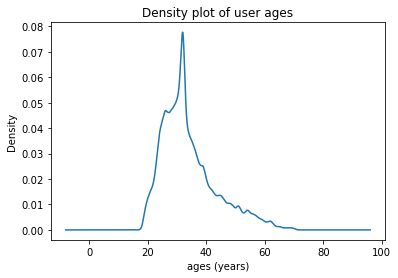

In [41]:
# plotting the density plot of the age distribution
bike_data_copy.ages.plot.density();
plt.xlabel("ages (years)")
plt.title("Density plot of user ages");

Again the ages are right-skewed. Suggesting that most of the riders are youths in their thirties and less.

**Let's see gender composition of the riders**

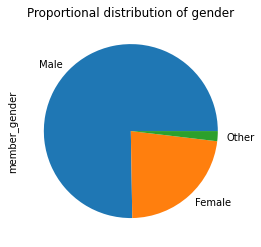

In [42]:
# checking the composition of the genders
bike_data_copy.member_gender.value_counts().plot.pie()
plt.title("Proportional distribution of gender");

Majority of the riders are male.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the `duration` in the datasets is infested by few outliers. This makes the distribution highly right skewed. The skweness make plotting the histogram to over generalized the lower values into one big bin. This hides the true distribution. To check this, I tuned the bins size to 100 and the range to range=(0, 5000) where majority of the observations lie.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The minimum birth year is 1878 which seems incredible because people of age 141 rarely exist and when they do they can hardly walk not to talk of riding a bike. I assume it is less likely for people above 70 to ride a bike. Thus, I dropped such senior citizens from the dataset.

## Bivariate Exploration

In this section, I investigated the relationships between pairs of variables in the dataset.

**Let's plot the heatmap of the features of interest and the duration**

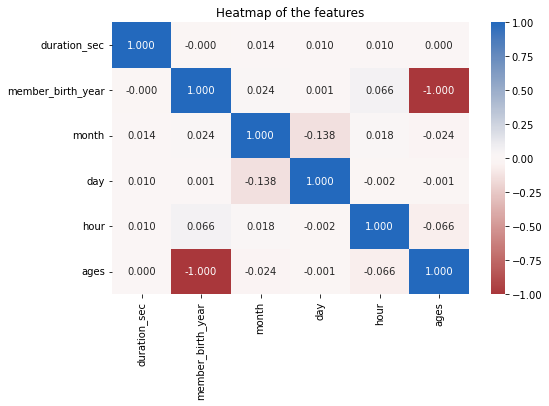

In [43]:
numeric_vars = ['duration_sec', "member_birth_year", 'month', 'day', 'hour', 'ages']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_data_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Heatmap of the features");
plt.show()

There are very weak linear correlations between all features of interest and the duration.

**Let's visualize the piarwise correlation between duration and other variables of interest.**

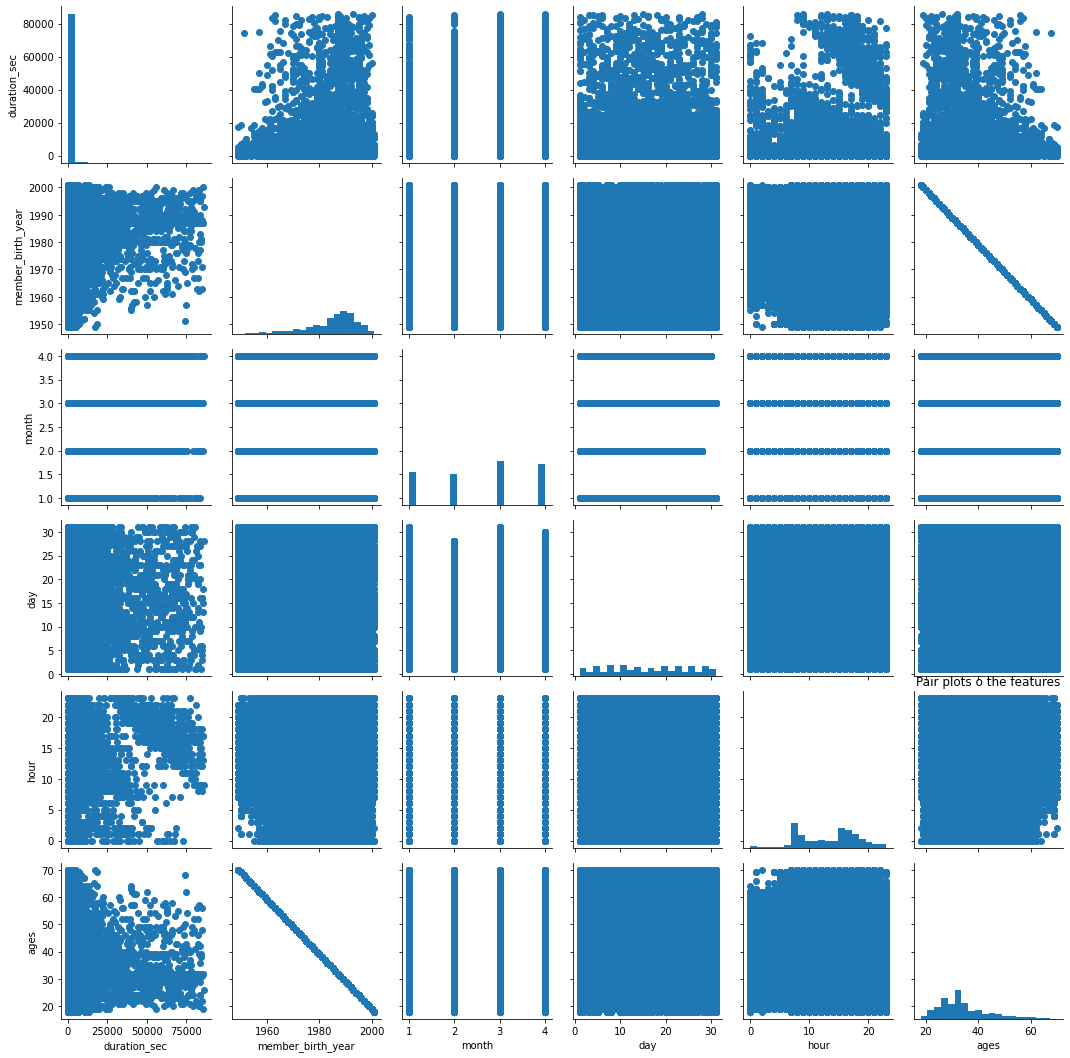

In [44]:
g = sb.PairGrid(data = bike_data_copy, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title("Pair plots o the features");

The above piarwise plots confirm the heatmap correlation coefficients and we can see no obvious linear correlation between duration and other features of interst.

**Let's see the summary statistics of the ages**

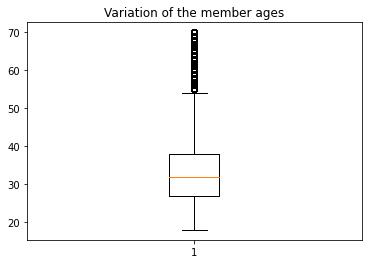

In [45]:
# plotting summary stats on box plot
plt.boxplot(bike_data_copy.ages);
plt.title("Variation of the member ages");

Although majority of the ages are between late thirties and below, there are quite a number of old aged bikers in their mid-fifities and above.

**Let's see the heatmap of the variables**

**Let's see the age distribution across gender violin plots of the genders**

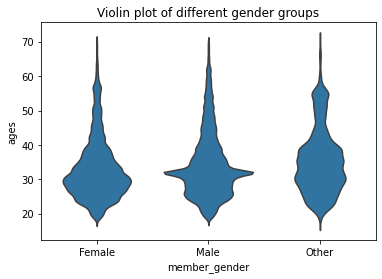

In [46]:
# plotting the violin plots of genders
base_color = sb.color_palette()[0] 
sb.violinplot(data=bike_data_copy, x='member_gender', y='ages', color=base_color, inner=None)
plt.xticks(rotation=0)
plt.title("Violin plot of different gender groups");

Most of the females are in their 30s and most of the males are a bit above 30. The other gender ages are fairly uniform.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The above piarwise plots and the heatmap of the correlation coefficients show no obvious linear correlation between duration and other features of interst.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A good number of the features are over plotted.

## Multivariate Exploration


**Let's find out whether the biking duration by hour depends on gender.**

C:\Users\Buhari Shehu\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


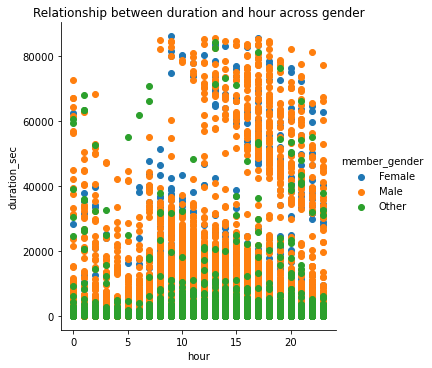

In [48]:
# plotting scatter plot
g = sb.FacetGrid(data = bike_data_copy, hue = 'member_gender', height = 5)
g.map(plt.scatter, 'hour', 'duration_sec')
g.add_legend()
plt.title("Relationship between duration and hour across gender");

We observe that the hour of the day doesn't determine how long a ride will last across diffrent genders in the dataset.

**Let's see the whether their are clusters in the scatter plot of the duration and age for diffrent user types**

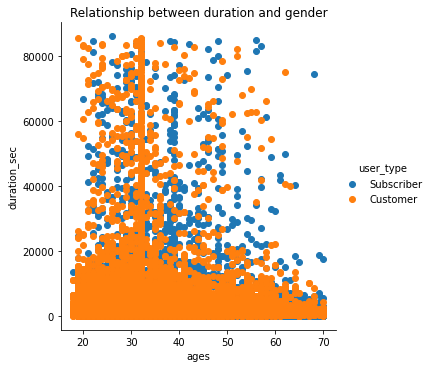

In [51]:
g = sb.FacetGrid(data = bike_data_copy, hue = 'user_type', height = 5);
g.map(plt.scatter, 'ages', 'duration_sec')
g.add_legend()
plt.title("Relationship between duration and gender");

We can observe that riders above 60 years of age are less likely to ride a bike for longer duration and the few that do are mostly subscribers. We can also observe a horizontal bar at around 33 years of age. This shows that most of the riders in these age group take rides across the whole range of the duration of the dataset.

**Let's see how duration varies by customer type and gender**

C:\Users\Buhari Shehu\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


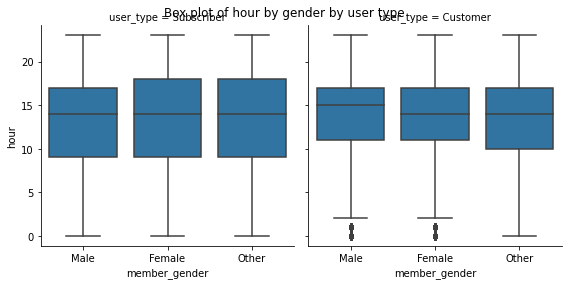

In [61]:
g = sb.FacetGrid(data = bike_data_copy, col = 'user_type', height = 4)
g.map(sb.boxplot, 'member_gender', 'hour')
g.fig.suptitle('Box plot of hour by gender by user type');


There is not much variations in the hours travel by all genders in both customer and subscriber category.

C:\Users\Buhari Shehu\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


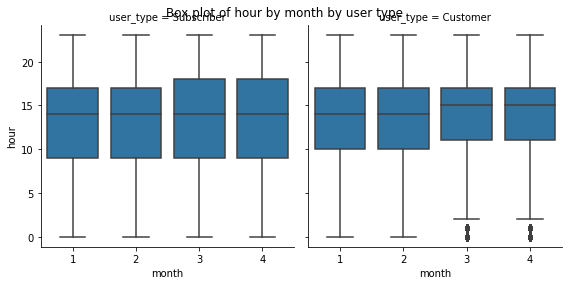

In [62]:
g = sb.FacetGrid(data = bike_data_copy, col = 'user_type', height = 4)
g.map(sb.boxplot, 'month', 'hour')
g.fig.suptitle('Box plot of hour by month by user type');

When are most trips taken in terms of time of day, day of the week, or month of the year?


How long does the average trip take?


Does the above depend on if a user is a subscriber or customer?

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Seems most of the bikers are 9-5 workers as those hours seems the busiest. Majority of the rides happened during the daytimes as expected.
-Bike sharing has gain public acceptance as overwelming majority of the users are subscribers instead of one off users.


### Were there any interesting or surprising interactions between features?

> The is a large amount of records which lead to overplotting.

## Conclusions
> - The 8th and 17th hours are the busiests. The duration taken by the riders does not depend on the hour of the day, user gender or type. 
-Thursday is the busiest amongst days and the weekends recorded the least traffic.


Reference

https://s3.amazonaws.com/fordgobike-data/index.html